In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import preprocessing, model_selection
import csv
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import time
import json
import random

In [4]:
np.arange(6)

array([0, 1, 2, 3, 4])

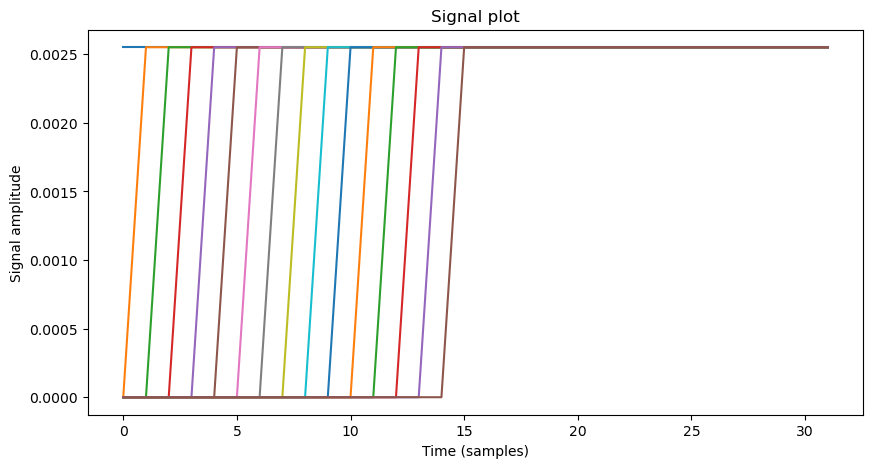

In [9]:
# def triangle_kernel(kerlen):
#     r = np.arange(kerlen)
#     kernel1d = (kerlen + 1 - np.abs(r - r[::-1])) / 2
#     kernel2d = np.outer(kernel1d, kernel1d)
#     kernel2d /= kernel2d.sum()
#     return kernel2d

import numpy as np

height = 16  # height of the isosceles triangle
base = 32  # base of the isosceles triangle
filter = np.tri(base, height, dtype=float)  # create a lower-triangular matrix with the desired shape
filter /= np.sum(filter)  # normalize the values so that they sum to 1

fig, ax = plt.subplots(figsize=(10, 5))
# Plot the signal
ax.plot(filter)
ax.set_xlabel('Time (samples)')
ax.set_ylabel('Signal amplitude')
ax.set_title('Signal plot')
plt.show()

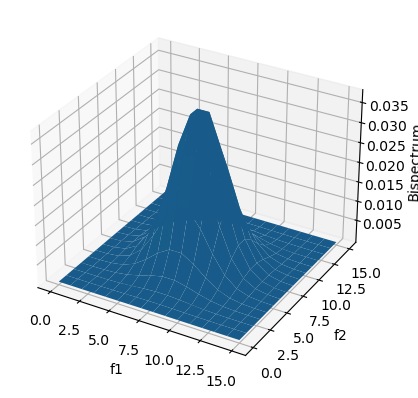

In [16]:
def gkernel(l=16, sig=2):
    """\
    Gaussian Kernel Creator via given length and sigma
    """

    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    xx, yy = np.meshgrid(ax, ax)

    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))

    return kernel / np.sum(kernel)

# Plot the bispectrum using contour plots
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(np.arange(16), np.arange(16))
ax.plot_surface(X, Y, gkernel())
ax.set_xlabel('f1')
ax.set_ylabel('f2')
ax.set_zlabel('Bispectrum')
plt.show()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


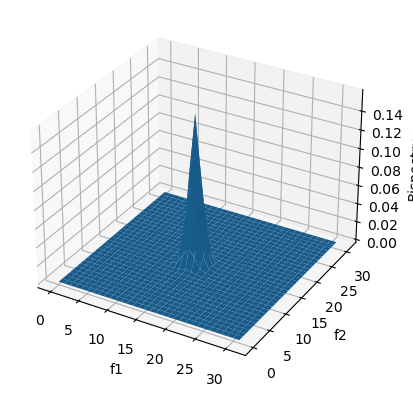

In [19]:
import numpy as np
from scipy.ndimage import gaussian_filter

# Define the size of the kernel
m, n = 32, 32

# Define the standard deviation of the Gaussian distribution
sigma = 1

# Create an empty kernel matrix of zeros
kernel = np.zeros((m, n))

# Calculate the center of the kernel
center = (m - 1) // 2, (n - 1) // 2

# Set the value of the center of the kernel to 1
kernel[center] = 1

# Apply the Gaussian filter to the kernel
kernel = gaussian_filter(kernel, sigma=sigma)

print(kernel)

# Plot the bispectrum using contour plots
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(np.arange(m), np.arange(n))
ax.plot_surface(X, Y, kernel)
ax.set_xlabel('f1')
ax.set_ylabel('f2')
ax.set_zlabel('Bispectrum')
plt.show()